<a href="https://colab.research.google.com/github/eduardoMeneghetti/projeto_data_minig/blob/main/trabalho_data_minig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
base_path = '/content/drive/My Drive/dataset/archive/'
categories = pd.read_csv(base_path + 'amazon_categories.csv')
products = pd.read_csv(base_path + 'amazon_products.csv')

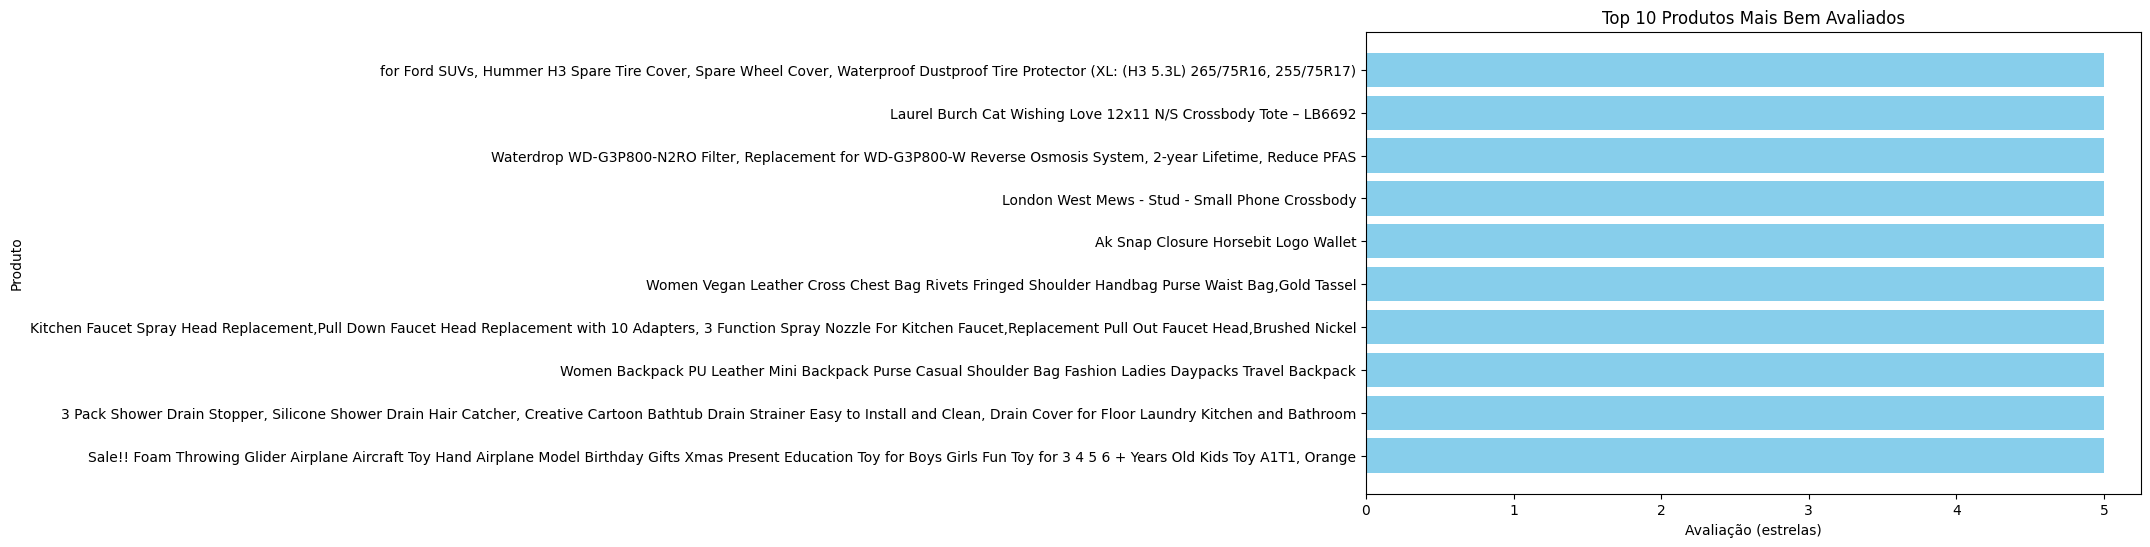

In [24]:
top_rated_products = products.sort_values(by='stars', ascending=False).head(10)
titles = top_rated_products['title']
stars = top_rated_products['stars']
plt.figure(figsize=(10, 6))
plt.barh(titles, stars, color='skyblue')
plt.xlabel('Avaliação (estrelas)')
plt.ylabel('Produto')
plt.title('Top 10 Produtos Mais Bem Avaliados')
plt.gca().invert_yaxis()
plt.show()

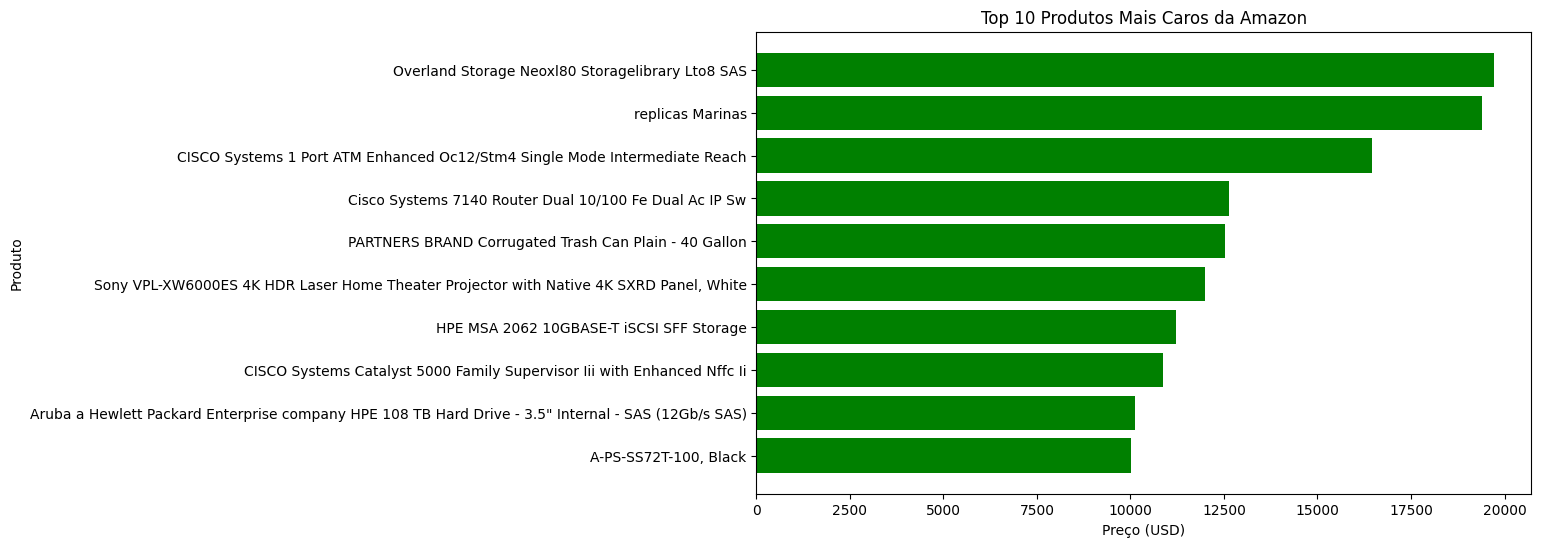

In [25]:
top_expensive_products = products.sort_values(by='price', ascending=False).head(10)

titles = top_expensive_products['title']
prices = top_expensive_products['price']

plt.figure(figsize=(10, 6))
plt.barh(titles, prices, color='green')
plt.xlabel('Preço (USD)')
plt.ylabel('Produto')
plt.title('Top 10 Produtos Mais Caros da Amazon')
plt.gca().invert_yaxis()
plt.show()


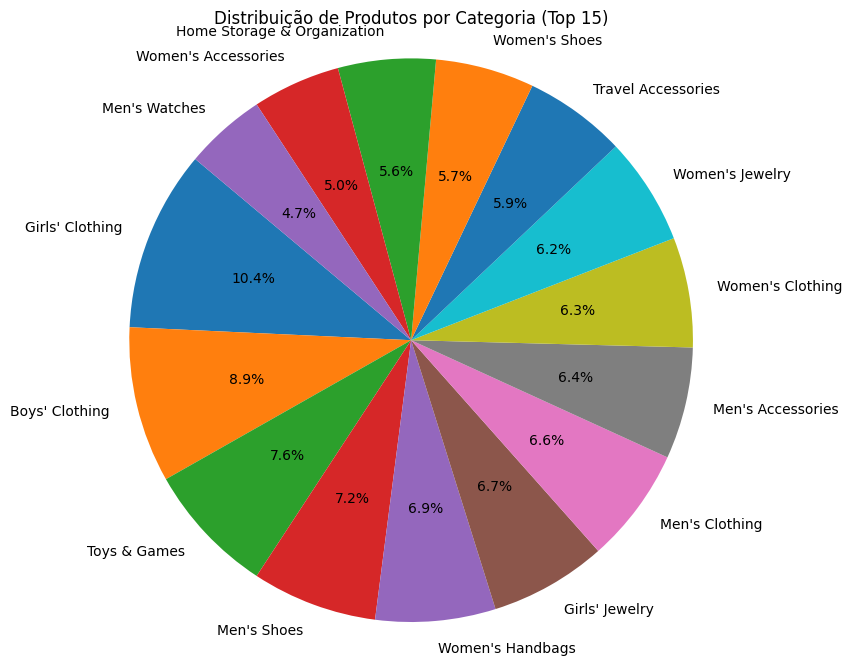

In [29]:
category_counts = products['category_id'].value_counts().reset_index()


category_counts.columns = ['category_id', 'count']

top_15_categories = category_counts.head(15)


category_labels = pd.merge(top_15_categories, categories, left_on='category_id', right_on='id')


labels = category_labels['category_name']
sizes = category_labels['count']


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Produtos por Categoria (Top 15)')
plt.axis('equal')
plt.show()


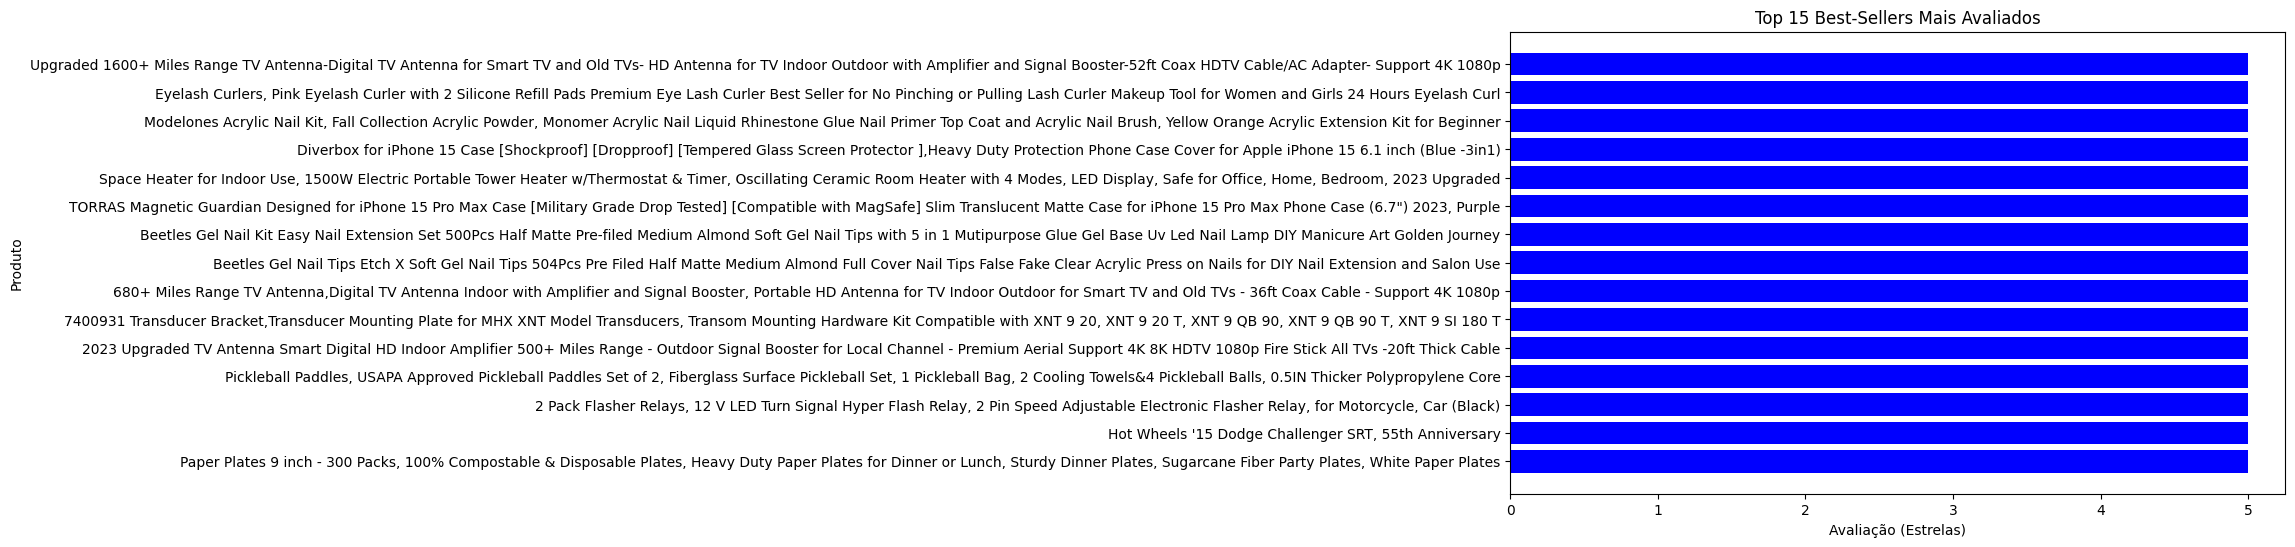

In [32]:
bestsellers = products[products['isBestSeller'] == True]

top_rated_bestsellers = bestsellers.sort_values(by='stars', ascending=False).head(15)

titles = top_rated_bestsellers['title']
stars = top_rated_bestsellers['stars']

plt.figure(figsize=(10, 6))
plt.barh(titles, stars, color='blue')
plt.xlabel('Avaliação (Estrelas)')
plt.ylabel('Produto')
plt.title('Top 15 Best-Sellers Mais Avaliados')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


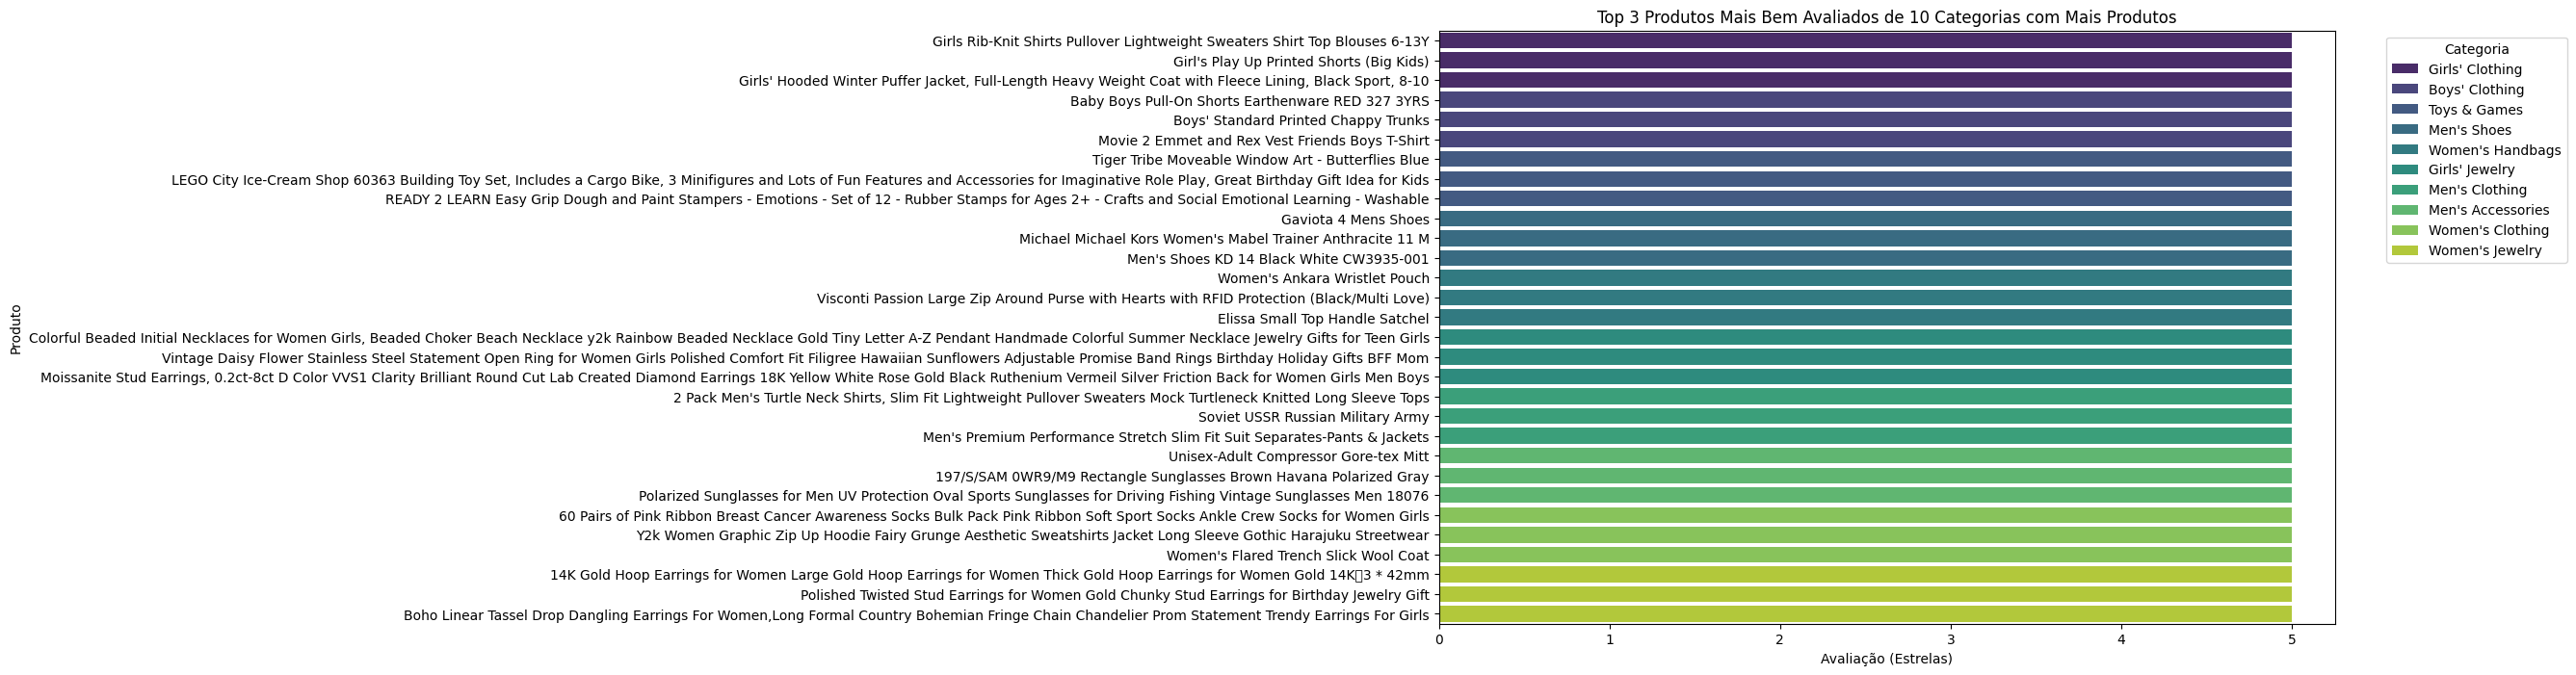

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = products['category_id'].value_counts().reset_index()


category_counts.columns = ['category_id', 'count']


top_10_categories = category_counts.head(10)

category_labels = pd.merge(top_10_categories, categories, left_on='category_id', right_on='id')


top_products = []

for category_id in top_10_categories['category_id']:

    category_products = products[products['category_id'] == category_id]

    top_3 = category_products.sort_values(by='stars', ascending=False).head(3)

    for _, row in top_3.iterrows():
        category_name = category_labels[category_labels['category_id'] == category_id]['category_name'].values[0]
        top_products.append({
            'category_name': category_name,
            'product_title': row['title'],
            'stars': row['stars']
        })

top_products_df = pd.DataFrame(top_products)


plt.figure(figsize=(12, 8))
sns.barplot(data=top_products_df, x='stars', y='product_title', hue='category_name', dodge=False, palette='viridis')

plt.title('Top 3 Produtos Mais Bem Avaliados de 10 Categorias com Mais Produtos')
plt.xlabel('Avaliação (Estrelas)')
plt.ylabel('Produto')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
